# Tribune collection metadata magic

This notebook helps you explore metadata (and images) from the State Library of NSW's Tribune collection. 

The metadata has been harvested from the SLNSW catalogue and [saved in CSV format](https://github.com/wragge/dxlab-tribune/blob/master/negatives/csv/all_items.csv). [See this post for more information](http://timsherratt.org/research-notebook/records-resistance/notes/tribune-metadata/) on the structure of the metadata.

Just work your way down the page running each cell by either clicking the play icon that appears when you hover over a cell, or by clicking a cell then hitting **Shift+Enter**.

To edit a cell, just click on it.

## Setting things up

In [1]:
# Import the libraries we need
import pandas as pd
import altair as alt
from altair import datum
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
from IPython.display import display, HTML
alt.renderers.enable('notebook')

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


RendererRegistry.enable('notebook')

----

## Let's load some data

The harvested metadata is currently sitting in another GitHub repository. We can load it directly from there using Pandas.

In [2]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/wragge/dxlab-tribune/master/negatives/csv/all_items.csv')

### Have a peek...

In [142]:
# Let's have a look inside...
# Note that both the columns and rows are truncated in this preview
df

series_number  part_number  item_number level  \
0                 1          1.0            1  ITEM   
1                 1          1.0            2  ITEM   
2                 1          1.0            3  ITEM   
3                 1          1.0            4  ITEM   
4                 1          1.0            5  ITEM   
5                 1          1.0            6  ITEM   
6                 1          1.0            7  ITEM   
7                 1          1.0            8  ITEM   
8                 1          1.0            9  ITEM   
9                 1          1.0           11  ITEM   
10                1          1.0           13  ITEM   
11                1          1.0           14  ITEM   
12                1          1.0           16  ITEM   
13                1          1.0           18  ITEM   
14                1          1.0           19  ITEM   
15                1          1.0           20  ITEM   
16                1          1.0           21  ITEM   
17                1          1.0           22  ITEM   
18                1          1.0           23  ITEM   
19                1          1.0           24  ITEM   
20                1          1.0           25  ITEM   
21                1          1.0           26  ITEM   
22                1          1.0           27  ITEM   
23                1          1.0           28  ITEM   
24                1          1.0           31  ITEM   
25                1          1.0           32  ITEM   
26                1          1.0           33  ITEM   
27                1          1.0           34  ITEM   
28                1          1.0           35  ITEM   
29                1          1.0           36  ITEM   
...             ...          ...          ...   ...   
1815              4          NaN           18  ITEM   
1816              4          NaN           19  ITEM   
1817              4          NaN           20  ITEM   
1818              4          NaN           21  ITEM   
1819              4          NaN           22  ITEM   
1820              4          NaN           23  ITEM   
1821              4          NaN           24  ITEM   
1822              4          NaN           25  ITEM   
1823              4          NaN           26  ITEM   
1824              4          NaN           27  ITEM   
1825              4          NaN           28  ITEM   
1826              4          NaN           29  ITEM   
1827              4          NaN           30  ITEM   
1828              4          NaN           31  ITEM   
1829              4          NaN           32  ITEM   
1830              4          NaN           33  ITEM   
1831              4          NaN           34  ITEM   
1832              4          NaN           35  ITEM   
1833              4          NaN           36  ITEM   
1834              4          NaN           37  ITEM   
1835              4          NaN           38  ITEM   
1836              4          NaN           40  ITEM   
1837              4          NaN           41  ITEM   
1838              4          NaN           42  ITEM   
1839              4          NaN           43  ITEM   
1840              4          NaN           44  ITEM   
1841              4          NaN           45  ITEM   
1842              4          NaN           46  ITEM   
1843              4          NaN           47  ITEM   
1844              4          NaN           48  ITEM   

                                                  title      call_number  \
0     Item 001: Tribune negatives including portrait...  ON 161/Item 001   
1     Item 002 : Tribune negatives including portrai...  ON 161/Item 002   
2     Item 003 : Tribune negatives including photogr...  ON 161/Item 003   
3     Item 004: Tribune negatives including internat...  ON 161/Item 004   
4     Item 005: Tribune negatives including Internat...  ON 161/Item 005   
5     Item 006: Tribune negatives including New Worl...  ON 161/Item 006   
6     Item 007: Tribune negatives including Matt Mun...  ON 161

----

## Create some summary data

We can use Pandas to give us a quick overview of the dataset.

### What are the column headings?

In [223]:
# What are the column headings?
# Can you see which ones are missing from the truncated sample above?
df.columns

Index(['series_number', 'part_number', 'item_number', 'level', 'title',
       'call_number', 'object_number', 'priref', 'intellectual_entity',
       'date_string', 'date_start', 'date_end', 'quantity', 'url',
       'parent_url', 'number_images', 'images', 'description', 'subjects',
       'topics', 'people', 'places'],
      dtype='object')

### How many records are there?

In [170]:
# How many items?
len(df)

1845

### How many images are there?

In [144]:
# How many images?
df['number_images'].sum()

60364

### What's the earliest start date?

In [145]:
# What's the earliest start date?
df['date_start'].min()

'1900-01-01 00:00:00'

### What's the latest end date?

In [146]:
# What's the latest end date?
df['date_end'].max()

'1990-12-31 00:00:00'

----

## Exploring topics

Topics are text tags describing features of the photographs. They're more free-form and fine-grained than the subjects, but there can bit a bit of overlap and inconsistency.

### Create a list of unique topics and sort them alphabetically

In [5]:
# Get unique values
topics = pd.unique(df['topics'].str.split('|', expand=True).stack()).tolist()
for topic in sorted(topics, key=str.lower):
    print(topic)

Aboriginal art
Aboriginal culture
Aboriginal peoples (Australians)
Aboriginal reserves
abortion
accidents & disasters
acting
activists
actors
advertising signs
aerial photographs
aeroplanes
aged people
agricultural exhibits
agricultural shows
airlines
airports
aliens
ambulances
amusement rides
anniversaries
antinuclear movement
antismoking movement
apartheid
apprentices
architects
architectural models
army cadets
arrests
art
art exhibitions
art galleries
artists
asbestos fabric
Asian peoples
astronauts
astronomers
astronomy
athletes
athletics
audiences
Australian flags
Australiana
authors
backyards
badges
ballet dancers
balloons
ballot papers
balls & dances
bands
bank personnel
banks
Banner (oats)
banners
banquets
barbecues (events)
barmaids
basketball
bathrooms
batteries (electric)
beaches
bears
beauty contestants
beauty contests
Bedford (trucks)
benches (seats)
betting shops
bicycles
billboards
birth control
birthday parties
bishops
blacksmiths
boardrooms
boats
boilermakers
bombs
boo

In [19]:
# Save as a CSV file
topics_df = pd.DataFrame(topics)
topics_df.columns = ['topic']
topics_df.to_csv('data/topics.csv', index=False)
display(HTML('<a target="_blank" href="data/topics.csv">Download topics.csv</a>'))

### How often is each topic used?

In [11]:
# Splits the topic column and counts frequencies
topic_counts = df['topics'].str.split('|').apply(lambda x: pd.Series(x).value_counts()).sum().astype('int').sort_values(ascending=False).to_frame().reset_index(level=0)
# Add column names
topic_counts.columns = ['topic', 'count']
# Display with horizontal bars
display(topic_counts.style.bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'}))

In [12]:
# Save as a CSV file
topic_counts.to_csv('data/topic_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/topic_counts.csv">Download topic_counts.csv</a>'))

### Search for records that include a topic

In [35]:
# Search topics
search_term = 'work'
topics_filtered = df.loc[df['topics'].str.contains(search_term, case=False, na=False)].copy()
topics_filtered

series_number  part_number  item_number level  \
13                1          1.0           18  ITEM   
21                1          1.0           26  ITEM   
26                1          1.0           33  ITEM   
37                1          1.0           46  ITEM   
41                1          1.0           50  ITEM   
50                1          2.0           59  ITEM   
52                1          2.0           61  ITEM   
56                1          2.0           65  ITEM   
61                1          2.0           70  ITEM   
66                1          2.0           79  ITEM   
68                1          2.0           81  ITEM   
70                1          2.0           83  ITEM   
75                1          2.0           88  ITEM   
77                1          2.0           90  ITEM   
80                1          2.0           93  ITEM   
99                1          3.0          117  ITEM   
101               1          3.0          119  ITEM   
102               1          3.0          120  ITEM   
130               1          4.0          151  ITEM   
135               1          4.0          156  ITEM   
168               1          4.0          189  ITEM   
172               1          4.0          193  ITEM   
205               1          5.0          231  ITEM   
216               1          5.0          242  ITEM   
240               1          6.0          266  ITEM   
250               1          6.0          276  ITEM   
257               1          6.0          283  ITEM   
258               1          6.0          284  ITEM   
259               1          6.0          285  ITEM   
262               1          6.0          288  ITEM   
...             ...          ...          ...   ...   
1498              3         11.0          841  ITEM   
1511              3         12.0          854  ITEM   
1532              3         12.0          875  ITEM   
1549              3         12.0          892  ITEM   
1581              3         13.0          926  ITEM   
1584              3         13.0          929  ITEM   
1589              3         13.0          934  ITEM   
1603              3         13.0          949  ITEM   
1608              3         14.0          954  ITEM   
1631              3         14.0          977  ITEM   
1635              3         14.0          986  ITEM   
1636              3         14.0          986  ITEM   
1637              3         14.0          987  ITEM   
1640              3         14.0          990  ITEM   
1650              3         14.0         1000  ITEM   
1653              3         15.0         1003  ITEM   
1654              3         15.0         1004  ITEM   
1684              3         15.0         1033  ITEM   
1692              3         15.0         1041  ITEM   
1694              3         15.0         1043  ITEM   
1732              3         16.0         1081  ITEM   
1765              3         17.0         1106  ITEM   
1770              3         17.0         1111  ITEM   
1781              3         17.0         1122  ITEM   
1794              3         17.0         1135  ITEM   
1797              4          NaN            1  ITEM   
1798              4          NaN            2  ITEM   
1799              4          NaN            3  ITEM   
1801              4          NaN            4  ITEM   
1809              4          NaN           12  ITEM   

                                                  title        call_number  \
13    Item 018: Tribune negatives including Transpor...    ON 161/Item 018   
21    Item 026: Tribune negatives including photogra...    ON 161/Item 026   
26    Item 033: Tribune negatives including anti-Vie...    ON 161/Item 033   
37    Item 046: Tribune negatives including Watersid...    ON 161/Item 046   
41    Item 050: Tribune negatives including Mick O'B...    ON 161/Item 050   
50    Item 059: Tribune negatives including Sydney I...    ON 161/Item 059   
52    Item 061: Tribune negatives including gathe

In [36]:
# Save as a CSV file
topics_filtered.to_csv('data/topics-search-{}.csv'.format(search_term), index=False)
display(HTML('<a target="_blank" href="data/topics-search-{0}.csv">Download topics-search-{0}.csv</a>'.format(search_term)))

----

## Exploring subjects

Subjects are a set of controlled and hierarchical descriptive labels following the [Library of Congress Subject Headings](http://id.loc.gov/authorities/subjects.html).

### Create a list of unique subject headings and sort them alphabetically

In [13]:
# Get unique values
subjects = pd.unique(df['subjects'].str.split('|', expand=True).stack()).tolist()
for subj in sorted(subjects, key=str.lower):
    print(subj)

Aboriginal Australians--Anniversaries.
Aboriginal Australians--Australia--Pictorial works.
Aboriginal Australians--Civil rights.
Aboriginal Australians--Criminal justice system.
Aboriginal Australians--Land tenure.
Aboriginal Australians--Mortality.
Aboriginal Australians--New South Wales--Nambucca Heads.
Aboriginal Australians--New South Wales--Walgett.
Aboriginal Australians--New South Wales.
Aboriginal Australians.
Adult Females
Adult Males
Anthropologists--Australia.
Anti-apartheid movements--Australia.
Anti-fascist movements--Australia.
Anti-war demonstrations--Australia.
Anti-war demonstrations--New South Wales
Anti-war demonstrations--New South Wales--Sydney.
Antinuclear movement--Australia.
Antinuclear movement--Northern Territory--Pine Gap
Antinuclear movement.
Architects and builders--New South Wales--Sydney.
athletes
Australia--Race relations.
Australian Council of Trade Unions--Congresses.
Authors, Australian--20th century.
Ballet companies - Australia.
Boiler-makers--Labor

In [14]:
# Save as a CSV file
subjects_df = pd.DataFrame(subjects)
subjects_df.columns = ['subject']
subjects_df.to_csv('data/subjects.csv', index=False)
display(HTML('<a target="_blank" href="data/subjects.csv">Download subjects.csv</a>'))

### How often is each subject used?

In [22]:
# Splits the subject column and counts frequencies
subject_counts = df['subjects'].str.split('|').apply(lambda x: pd.Series(x).value_counts()).sum().astype('int').sort_values(ascending=False).to_frame().reset_index(level=0)
# Add column names
subject_counts.columns = ['subject', 'count']
# Display with horizontal bars
display(subject_counts.style.bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'}))

In [23]:
# Save as a CSV file
subject_counts.to_csv('data/subject_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/subject_counts.csv">Download subject_counts.csv</a>'))

### Search for records with a particular subject

In [33]:
search_term = 'Pine Gap'
subjects_filtered = df.loc[df['subjects'].str.contains(search_term, case=False, na=False)].copy()
subjects_filtered

series_number  part_number  item_number level  \
1438              3         10.0          765  ITEM   
1439              3         10.0          766  ITEM   
1440              3         10.0          767  ITEM   
1441              3         10.0          768  ITEM   
1632              3         14.0          981  ITEM   
1667              3         15.0         1017  ITEM   
1668              3         15.0         1018  ITEM   
1669              3         15.0         1019  ITEM   
1670              3         15.0         1020  ITEM   
1671              3         15.0         1021  ITEM   
1672              3         15.0         1022  ITEM   
1800              4          NaN           39  ITEM   

                                                  title       call_number  \
1438  Item 0765: Tribune negatives including Pine Ga...  ON 160/Item 0765   
1439  Item 0766: Tribune negatives including Pine Ga...  ON 160/Item 0766   
1440  Item 0767: Tribune negatives including Pine Ga...  ON 160/Item 0767   
1441  Item 0768: Tribune negatives including Pine Ga...  ON 160/Item 0768   
1632  Item 0981: Tribune negatives including anti-nu...  ON 160/Item 0981   
1667  Item 1017: Tribune negatives including Seaman'...  ON 160/Item 1017   
1668  Item 1018: Tribune negatives including anti-ba...  ON 160/Item 1018   
1669  Item 1019: Tribune negatives including anti-nu...  ON 160/Item 1019   
1670  Item 1020: Tribune negatives including anti-ba...  ON 160/Item 1020   
1671  Item 1021: Tribune negatives including anti-US...  ON 160/Item 1021   
1672  Item 1022: Tribune negatives including anti-nu...  ON 160/Item 1022   
1800  Item 039: Tribune negatives including protest ...   ON 162/Item 039   

      object_number     priref intellectual_entity            date_string  \
1438        1051266  110370322           IE4438816          November 1983   
1439        1051267  110370323           IE4436528          November 1983   
1440        1051270  110370325           IE4433455          November 1983   
1441        1051271  110370326           IE4441815          November 1983   
1632        1055331  110370670           IE4468784  October-December 1986   
1667        1055395  110370728           IE4476729           October 1987   
1668        1055396  110370729           IE4478552           October 1987   
1669        1055397  110370730           IE4481831           October 1987   
1670        1055398  110370731           IE4480336           October 1987   
1671        1055400  110370733           IE4475820           October 1987   
1672        1055402  110370735           IE4477933           October 1987   
1800        1045907  110369890           IE4589248                   198-   

           ...             quantity  \
1438       ...         30 negatives   
1439       ...         34 negatives   
1440       ...         20 negatives   
1441       ...         32 negatives   
1632       ...         41 negatives   
1667       ...         41 negatives   
1668       ...         42 negatives   
1669       ...         40 negatives   
1670       ...         38 negatives   
1671       ...         38 negatives   
1672       ...         34 negatives   
1800       ...         22 negatives   

                                                    url  \
1438  http://archival.sl.nsw.gov.au/Details/archive/...   
1439  http://archival.sl.nsw.gov.au/Details/archive/...   
1440  http://archival.sl.nsw.gov.au/Details/archive/...   
1441  http://archival.sl.nsw.gov.au/Details/archive/...   
1632  http://archival.sl.nsw.gov.au/Details/archive/...   
1667  http://archival.sl.nsw.gov.au/Details/archive/...   
1668  http://archival.sl.nsw.gov.au/Details/archive/...   
1669  http://archival.sl.nsw.gov.au/Details/archive/...   
1670  http://archival.sl.nsw.gov.au/Details/archive/...   
1671  http://archival.sl.nsw.gov.au/Details/archive/...   
1672  http://archival.sl.nsw.gov.au/Details/archive/...   
1800  http://archival.sl.nsw.gov.au/Details/archive/...   

          

In [34]:
# Save as a CSV file
subjects_filtered.to_csv('data/subjects-search-{}.csv'.format(search_term), index=False)
display(HTML('<a target="_blank" href="data/subjects-search-{0}.csv">Download subjects-search-{0}.csv</a>'.format(search_term)))

----

## Exploring people and organisations

### Create a list of unique names and sort them alphabetically

In [15]:
# Get unique values
people = pd.unique(df['people'].str.split('|', expand=True).stack()).tolist()
for person in sorted(people):
    print(person)

2UW (Radio station : Sydney, N.S.W.)
Aarons, Brian, 1945-
Aarons, Eric
Aarons, Laurie, 1917-2005
Aboriginal Tent Embassy (Canberra, A.C.T.)
Actors and Announcers Equity Association of Australia
Affley, Declan, 1939-1985
Air New Zealand
Air-India
Amalgamated Engineering Union.
Amalgamated Engineering Union. Australian Section.
Amalgamated Metal Workers' Union (Australia)
Amalgamated Postal Workers' Union
Ampol Petroleum Limited
Anderson, Michael
Ansett Airlines of Australia
Anzac Day
Ashe, Arthur, 1943-
Australian Ballet
Australian Broadcasting Corporation
Australian Builders' Labourers' Federation
Australian Builders' Labourers' Federation. New South Wales Branch
Australian Council of Trade Unions
Australian Iron and Steel
Australian Journalists' Association
Australian Labor Party
Australian Labor Party. Kings Cross Branch
Australian Labor Party. New South Wales Branch. Conference. (1965 : Sydney, N.S.W.)
Australian Workers Union. New South Wales Branch
Bacon, Wendy.
Bandler, Faith, 19

In [20]:
# Save as a CSV file
people_df = pd.DataFrame(people)
people_df.columns = ['people']
people_df.to_csv('data/people.csv', index=False)
display(HTML('<a target="_blank" href="data/people.csv">Download people.csv</a>'))

### How often is each name used?

In [24]:
# Splits the people column and counts frequencies
people_counts = df['people'].str.split('|').apply(lambda x: pd.Series(x).value_counts()).sum().astype('int').sort_values(ascending=False).to_frame().reset_index(level=0)
# Add column names
people_counts.columns = ['name', 'count']
# Display with horizontal bars
display(people_counts.style.bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'}))

In [25]:
# Save as a CSV file
people_counts.to_csv('data/people_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/people_counts.csv">Download people_counts.csv</a>'))

### Search for names

In [31]:
search_term = 'union'
people_filtered = df.loc[df['people'].str.contains(search_term, case=False, na=False)].copy()
people_filtered

series_number  part_number  item_number level  \
8                1          1.0            9  ITEM   
13               1          1.0           18  ITEM   
14               1          1.0           19  ITEM   
16               1          1.0           21  ITEM   
38               1          1.0           47  ITEM   
42               1          2.0           51  ITEM   
45               1          2.0           54  ITEM   
47               1          2.0           56  ITEM   
48               1          2.0           57  ITEM   
51               1          2.0           60  ITEM   
63               1          2.0           76  ITEM   
105              1          3.0          123  ITEM   
126              1          3.0          147  ITEM   
167              1          4.0          188  ITEM   
172              1          4.0          193  ITEM   
179              1          5.0          205  ITEM   
183              1          5.0          209  ITEM   
184              1          5.0          210  ITEM   
190              1          5.0          216  ITEM   
198              1          5.0          224  ITEM   
199              1          5.0          225  ITEM   
201              1          5.0          227  ITEM   
202              1          5.0          228  ITEM   
203              1          5.0          229  ITEM   
206              1          5.0          232  ITEM   
219              1          5.0          245  ITEM   
237              1          6.0          263  ITEM   
247              1          6.0          273  ITEM   
248              1          6.0          274  ITEM   
251              1          6.0          277  ITEM   
252              1          6.0          278  ITEM   
255              1          6.0          281  ITEM   
256              1          6.0          282  ITEM   
259              1          6.0          285  ITEM   
260              1          6.0          286  ITEM   
270              1          6.0          296  ITEM   
273              1          6.0          299  ITEM   
275              1          7.0          301  ITEM   
276              1          7.0          302  ITEM   
284              1          7.0          310  ITEM   
292              1          7.0          320  ITEM   
324              1          8.0          352  ITEM   
335              1          8.0          363  ITEM   
338              1          8.0          366  ITEM   
345              1          8.0          373  ITEM   
498              1         11.0          526  ITEM   
501              1         11.0          529  ITEM   
515              1         11.0          545  ITEM   
518              1         11.0          548  ITEM   
536              1         12.0          566  ITEM   
537              1         12.0          567  ITEM   
549              1         12.0          579  ITEM   
578              1         13.0          608  ITEM   
593              1         13.0          623  ITEM   
594              1         13.0          624  ITEM   
658              1         14.0          697  ITEM   

                                                 title      call_number  \
8    Item 009: Tribune negatives including Transpor...  ON 161/Item 009   
13   Item 018: Tribune negatives including Transpor...  ON 161/Item 018   
14   Item 019: Tribune negatives including price ri...  ON 161/Item 019   
16   Item 021: Tribune negatives including Building...  ON 161/Item 021   
38   Item 047: Tribune negatives including Building...  ON 161/Item 047   
42   Item 051: Tribune negatives including Amalgama...  ON 161/Item 051   
45   Item 054: Tribune negatives including Transpor...  ON 161/Item 054   
47   Item 056: Tribune negatives including Printing...  ON 161/Item 056   
48   Item 057: Tribune negatives including ships Bi...  ON 161/Item 057   
51   Item 060: Tribune negatives including portrait...  ON 161/Item 060   
63   Item 076: Tribune negatives including Peace Wo...  ON 161/Item 076   
105  Item 123: Tribune neg

In [32]:
# Save as a CSV file
people_filtered.to_csv('data/people-search-{}.csv'.format(search_term), index=False)
display(HTML('<a target="_blank" href="data/people-search-{0}.csv">Download people-search-{0}.csv</a>'.format(search_term)))

----

## Exploring places

### Create a list of unique place names and sort them alphabetically

In [17]:
# Get unique values in multi-value column
places = pd.unique(df['places'].str.split('|', expand=True).stack()).tolist()
for place in sorted(places, key=str.lower):
    print(place)

Aboriginal Tent Embassy (Canberra, A.C.T.)
Adelaide (S. Aust.)
Alexandria (N.S.W.)
Aquatic Club (corner Riley & Cathedral Streets, Woolloomooloo, N.S.W.)
Art Gallery of New South Wales
Australia Square (Sydney, N.S.W.)
Australian Iron and Steel (Port Kembla, N.S.W.)
Australian Lubricating Oil Refinery (Kurnell, N.S.W.)
Balmain Town Hall (Balmain, N.S.W.)
Bank of New South Wales (George Street, Sydney, N.S.W.)
Bankstown (N.S.W.)
Bankstown Square (Bankstown, N.S.W.)
Belmore Park (Sydney, N.S.W.)
Berowra Waters (N.S.W.)
Boggabilla (N.S.W.)
Bondi Beach (N.S.W.)
Botany Bay (N.S.W.)
Bougainville (Papua New Guinea)
Bourke Street (Waterloo, N.S.W.)
Bowraville (N.S.W.)
Bronte Park (Bronte, N.S.W.)
Bulli (N.S.W.)
Burwood Council Chambers
Campbell Street (Sydney, N.S.W.)
Canberra (A.C.T.)
Cathedral Street (Woolloomooloo, N.S.W.)
Cenotaph (Martin Place, Sydney, N.S.W.)
Centennial Park (Sydney, N.S.W.)
Central Police Court (Liverpool Street, Sydney, N.S.W.)
Central Railway Station (Sydney, N.S.W.)


In [21]:
# Save as a CSV file
places_df = pd.DataFrame(places)
places_df.columns = ['place']
places_df.to_csv('data/places.csv', index=False)
display(HTML('<a target="_blank" href="data/places.csv">Download places.csv</a>'))

### How many times is each place name used?

In [26]:
# Splits the place column and counts frequencies
place_counts = df['places'].str.split('|').apply(lambda x: pd.Series(x).value_counts()).sum().astype('int').sort_values(ascending=False).to_frame().reset_index(level=0)
# Add column names
place_counts.columns = ['place', 'count']
# Display with horizontal bars
display(place_counts.style.bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'}))

In [27]:
# Save as a CSV file
place_counts.to_csv('data/place_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/place_counts.csv">Download place_counts.csv</a>'))

### Search for a place

In [28]:
search_term = 'university'
places_filtered = df.loc[df['places'].str.contains(search_term, case=False, na=False)].copy()
places_filtered

series_number  part_number  item_number level  \
40                1          1.0           49  ITEM   
81                1          2.0           94  ITEM   
307               1          7.0          335  ITEM   
315               1          7.0          343  ITEM   
317               1          7.0          345  ITEM   
318               1          7.0          346  ITEM   
320               1          7.0          348  ITEM   
325               1          8.0          353  ITEM   
337               1          8.0          365  ITEM   
338               1          8.0          366  ITEM   
340               1          8.0          368  ITEM   
423               1         10.0          451  ITEM   
426               1         10.0          454  ITEM   
460               1         10.0          488  ITEM   
461               1         10.0          489  ITEM   
511               1         11.0          539  ITEM   
518               1         11.0          548  ITEM   
521               1         12.0          551  ITEM   
543               1         12.0          573  ITEM   
584               1         13.0          614  ITEM   
591               1         13.0          621  ITEM   
592               1         13.0          622  ITEM   
634               1         14.0          664  ITEM   
635               1         14.0          665  ITEM   
636               1         14.0          666  ITEM   
669               1         15.0          711  ITEM   
671               1         15.0          714  ITEM   
673               1         15.0          716  ITEM   
710               2          1.0           18  ITEM   
718               2          1.0           26  ITEM   
826               2          3.0          134  ITEM   
857               2          4.0          171  ITEM   
939               2          6.0          256  ITEM   
993               3          1.0          314  ITEM   
1596              3         13.0          942  ITEM   
1815              4          NaN           18  ITEM   
1821              4          NaN           24  ITEM   

                                                  title       call_number  \
40    Item 049: Tribune negatives including demonstr...   ON 161/Item 049   
81    Item 094: Tribune negatives including anti-Vie...   ON 161/Item 094   
307   Item 335: Tribune negatives including Sydney U...   ON 161/Item 335   
315   Item 343: Tribune negatives including police o...   ON 161/Item 343   
317   Item 345: Tribune negatives including demonstr...   ON 161/Item 345   
318   Item 346: Tribune negatives including portrait...   ON 161/Item 346   
320   Item 348: Tribune negatives including demonstr...   ON 161/Item 348   
325   Item 353: Tribune negatives including construc...   ON 161/Item 353   
337   Item 365: Tribune negatives including Flo Davi...   ON 161/Item 365   
338   Item 366: Tribune negatives including football...   ON 161/Item 366   
340   Item 368: Tribune negatives including guerilla...   ON 161/item 368   
423   Item 451: Tribune negatives including socialis...   ON 161/Item 451   
426   Item 454: Tribune negatives including Student ...   ON 161/Item 454   
460   Item 488: Tribune negatives including views of...   ON 161/Item 488   
461   Item 489: Tribune negatives including demonstr...   ON 161/Item 489   
511   Item 539: Tribune negatives including demonstr...   ON 161/Item 539   
518   Item 548: Tribune negatives including 5th Nati...   ON 161/Item 548   
521   Item 551: Tribune negatives including the exte...   ON 161/Item 551   
543   Item 573: Tribune negatives including demonstr...   ON 161/Item 573   
584   Item 614: Tribune negatives including various ...   ON 161/item 614   
591   Item 621: Tribune negatives including demonstr...   ON 161/Item 621   
592   Item 622: Tribune negatives including various ...   ON 161/Item 622   
634   Item 664: Tribune negatives including demonstr...   ON 161/Item 664   
635   Item 665: Tribune negatives including members ...   ON 161/it

In [30]:
# Save as a CSV file
places_filtered.to_csv('data/places-search-{}.csv'.format(search_term), index=False)
display(HTML('<a target="_blank" href="data/places-search-{0}.csv">Download places-search-{0}.csv</a>'.format(search_term)))

----

## Exploring dates

### Chart the number of records per year

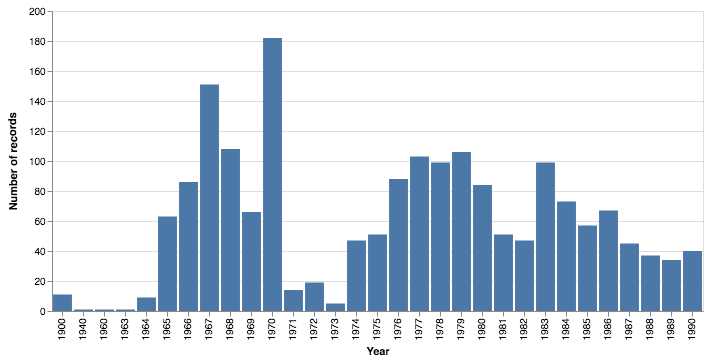

In [198]:
# Let's make a chart of the start dates!
# What happens when you change the :O to :T
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('year(date_start):O', title='Year'),
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    tooltip=[alt.Tooltip('year(date_start):O', title='Year'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)
chart

### Search for a date

In [37]:
date = '1900-01-01 00:00:00'
dates_filtered = df.loc[df['date_start'] == date].copy()
dates_filtered

series_number  part_number  item_number level  \
164              1          4.0          185  ITEM   
215              1          5.0          241  ITEM   
216              1          5.0          242  ITEM   
217              1          5.0          243  ITEM   
240              1          6.0          266  ITEM   
253              1          6.0          279  ITEM   
279              1          7.0          305  ITEM   
344              1          8.0          372  ITEM   
503              1         11.0          531  ITEM   
504              1         11.0          532  ITEM   
634              1         14.0          664  ITEM   

                                                 title      call_number  \
164  Item 185: Tribune negatives including Campaign...  ON 161/Item 185   
215  Item 241: Tribune negatives including anti-Vie...  ON 161/Item 241   
216  Item 242: Tribune negatives including sawmill,...  ON 161/Item 242   
217  Item 243: Tribune negatives including building...  ON 161/Item 243   
240  Item 266: Tribune negatives including the Inte...  ON 161/Item 266   
253  Item 279: Tribune negatives including Tribune ...  ON 161/Item 279   
279  Item 305 : Tribune negatives including model o...  ON 161/Item 305   
344  Item 372: Tribune negatives including teachers...  ON 161/Item 372   
503  Item 531: Tribune negatives including unidenti...  ON 161/Item 531   
504  Item 532: Tribune negatives including demonstr...  ON 161/Item 532   
634  Item 664: Tribune negatives including demonstr...  ON 161/Item 664   

     object_number     priref intellectual_entity             date_string  \
164        1269553  110374102           IE4531172  between 1964 and 1967?   
215        1290868  110374254           IE4548869                   1967?   
216        1290870  110374255           IE4549127                   1967?   
217        1290871  110374256           IE4534780                    1967   
240        1296813  110374495           IE4546075                     NaN   
253        1302368  110374530           IE4549662                     NaN   
279        1336570  110374689           IE4545565                     NaN   
344        1344391  110375009           IE4544365                     NaN   
503        1342001  110374818           IE4566152                     NaN   
504        1342003  110374820           IE4564054                     NaN   
634        1344359  110374980           IE4581314                     NaN   

                           ...                              quantity  \
164                        ...                          35 negatives   
215                        ...                          36 negatives   
216                        ...                          35 negatives   
217                        ...                          36 negatives   
240                        ...                          34 negatives   
253                        ...                          36 negatives   
279                        ...                          33 negatives   
344                        ...                          36 negatives   
503                        ...                          33 negatives   
504                        ...                          36 negatives   
634                        ...                          36 negatives   

                                                   url  \
164  http://archival.sl.nsw.gov.au/Details/archive/...   
215  http://archival.sl.nsw.gov.au/Details/archive/...   
216  http://archival.sl.nsw.gov.au/Details/archive/...   
217  http://archival.sl.nsw.gov.au/Details/archive/...   
240  http://archival.sl.nsw.gov.au/Details/archive/...   
253  http://archival.sl.nsw.gov.au/Details/archive/...   
279  http://archival.sl.nsw.gov.au/Details/archive/...   
344  http://archival.sl.nsw.gov.au/Details/archive/...   
503  http://archival.sl.nsw.gov.au/Details/archive/...   
504  http://archival.sl.nsw.gov.au/Details/archive/...   
634  http://archival.sl.nsw

In [41]:
# Save as a CSV file
dates_filtered.to_csv('data/dates-search-{}.csv'.format(date.replace(' 00:00:00', '')), index=False)
display(HTML('<a target="_blank" href="data/dates-search-{0}.csv">Download dates-search-{0}.csv</a>'.format(date.replace(' 00:00:00', ''))))

----

## Exploring titles

### Make a word cloud

(-0.5, 1199.5, 799.5, -0.5)

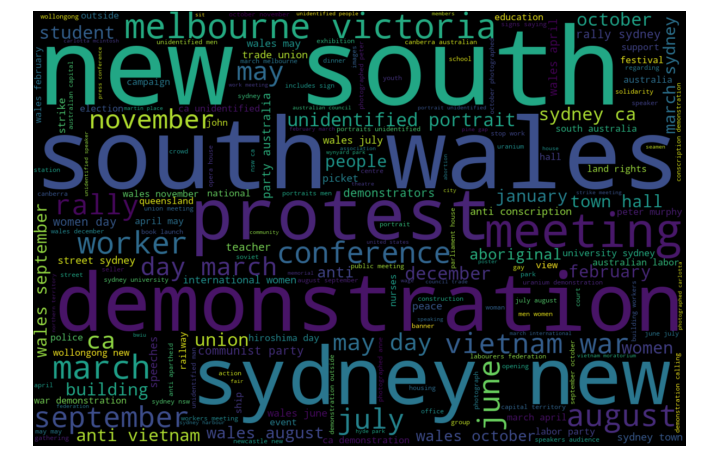

In [222]:
stopwords = nltk.corpus.stopwords.words('english')
# Words we want to exclude
exclude = stopwords + ['tribune', 'negatives', 'including', 'item']

# Turn all the titles into one big string
titles = df['title'].str.lower().str.cat(sep=' ')

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=800, stopwords=exclude).generate(titles)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

----

## Exploring descriptions

The `description` field contains free text descriptions of the photographs. Sometimes this can include numbered lists relating descriptions to specific images.

### Make a word cloud

(-0.5, 1199.5, 799.5, -0.5)

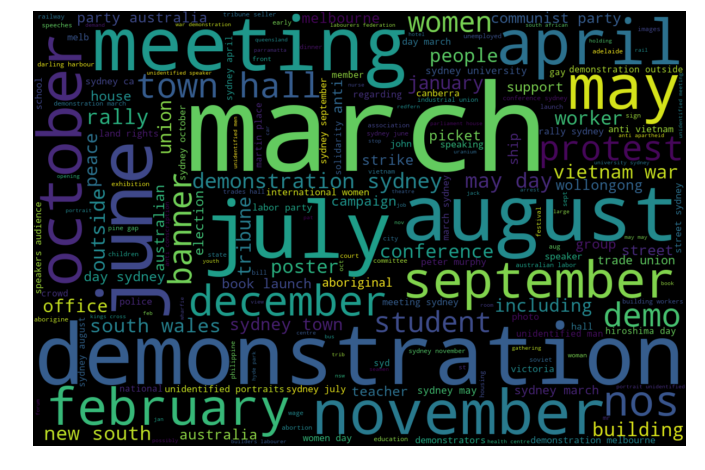

In [220]:
stopwords = nltk.corpus.stopwords.words('english')
# words we want to exclude
exclude = stopwords + ['image', 'descriptions', 'description', 'provided', 'cataloguer', 'negative', 'sleeve', 'titled', 'original', 'include', 'includes', 'row', 'rows']

# Add all the descriptions together to make one big string
descriptions = df['description'].str.lower().str.cat(sep=' ')

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=800, stopwords=exclude).generate(descriptions)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Search descriptions

In [42]:
search_term = 'eviction'
desc_filtered = df.loc[df['description'].str.contains(search_term, case=False, na=False)].copy()
desc_filtered

series_number  part_number  item_number level  \
656               1         14.0          695  ITEM   
666               1         15.0          706  ITEM   
1057              3          2.0          382  ITEM   
1231              3          6.0          559  ITEM   
1262              3          6.0          591  ITEM   
1266              3          6.0          595  ITEM   
1525              3         12.0          868  ITEM   
1570              3         13.0          915  ITEM   
1639              3         14.0          989  ITEM   

                                                  title       call_number  \
656   Item 695: Tribune negatives including general ...        ON 161/695   
666   Item 706: Tribune negatives including portrait...   ON 161/Item 706   
1057  Item 0382: Tribune negatives including disarma...  ON 160/Item 0382   
1231  Item 0559: Tribune negatives including Carol O...  ON 160/Item 0559   
1262  Item 0591: Tribune negatives including public ...  ON 160/Item 0591   
1266  Item 0595: Tribune negatives including Surry S...  ON 160/Item 0595   
1525  Item 0868: Tribune negatives including Helen B...  ON 160/Item 0868   
1570  Item 0915: Tribune negatives including house e...  ON 160/Item 0915   
1639  Item 0989: Tribune negatives including nurses ...  ON 160/Item 0989   

      object_number     priref intellectual_entity      date_string  \
656          965302  110366674            IE468006  March-May, 1972   
666         1344470  110375069           IE4580049             1972   
1057        1045565  110369615           IE4373180    November 1978   
1231        1045937  110369912           IE4416963        1980-1981   
1262        1045994  110369948           IE4416378       March 1981   
1266        1045999  110369953           IE4422197       March 1981   
1525        1055052  110370482           IE4467925             1985   
1570        1055164  110370554            IE690939        1984-1985   
1639        1055339  110370678           IE4470565    November 1986   

                         ...                               quantity  \
656                      ...                         43 photographs   
666                      ...                           36 negatives   
1057                     ...                           33 negatives   
1231                     ...                           42 negatives   
1262                     ...                           34 negatives   
1266                     ...                           37 negatives   
1525                     ...                           35 negatives   
1570                     ...                      16 transparencies   
1639                     ...                           41 negatives   

                                                    url  \
656   http://archival.sl.nsw.gov.au/Details/archive/...   
666   http://archival.sl.nsw.gov.au/Details/archive/...   
1057  http://archival.sl.nsw.gov.au/Details/archive/...   
1231  http://archival.sl.nsw.gov.au/Details/archive/...   
1262  http://archival.sl.nsw.gov.au/Details/archive/...   
1266  http://archival.sl.nsw.gov.au/Details/archive/...   
1525  http://archival.sl.nsw.gov.au/Details/archive/...   
1570  http://archival.sl.nsw.gov.au/Details/archive/...   
1639  http://archival.sl.nsw.gov.au/Details/archive/...   

                                             parent_url number_images  \
656   http://archival.sl.nsw.gov.au/Details/archive/...            43   
666   http://archival.sl.nsw.gov.au/Details/archive/...            36   
1057  http://archival.sl.nsw.gov.au/Details/archive/...            33   
1231  http://archival.sl.nsw.gov.au/Details/archive/...            42   
1262  http://archival.sl.nsw.gov.au/Details/archive/...            34   
1266  http://archival.sl.nsw.gov.au/Details/archive/...            37   
1525  http://archival.sl.nsw.gov.au/Details/archive/...            35   
1570  http://archival.sl.nsw.gov.au/Details/archive/...            23   
1639  http://a

In [43]:
# Save as a CSV file
desc_filtered.to_csv('data/description-search-{}.csv'.format(search_term), index=False)
display(HTML('<a target="_blank" href="data/description-search-{0}.csv">Download description-search-{0}.csv</a>'.format(search_term)))

----

## Examine rows and fields

If you've searched in one of the fields you might like to examine a specific row in more detail. Just change `row_number` in the cell below.

### Get the metadata for a specific row

In [162]:
# Inspect a row by row number
# Change the row_number to display a different row
# The row number (or index), is in the first column
row_number = 650
df.loc[row_number]

series_number                                                          1
part_number                                                           14
item_number                                                          680
level                                                               ITEM
title                  Item 680: Tribune negatives including speakers...
call_number                                                   ON 161/680
object_number                                                     965301
priref                                                         110366673
intellectual_entity                                             IE467347
date_string                                               February, 1972
date_start                                           1972-02-01 00:00:00
date_end                                             1972-02-29 00:00:00
quantity                                                    36 negatives
url                    http://archival.sl.nsw.gov.a

### Get the value of a specific field in the selected row

In [163]:
# Inspect a field in a particular row
# In this case we're looking at the 'description' field
df.loc[row_number]['description']

"Image descriptions provided by cataloguer.|1-2. First anniversary dinner of Retired Waterside Workers' Association members, February 1972.|3. Retired waterside worker Albert Hobson dancing with wife, Alice, at a Retired Waterside Workers' Association dinner, February 1972.|4. Women leaving Silverwater prison after visiting Wendy Bacon.|5-6. Crowd outside Silverwater prison.|7-8. Freedom of expression rally in Martin Place.|9. University of NSW law lecturer Tony Blackshield addresses a freedom of expression rally outside the G.P.O., Martin Place.|10-11. Freedom of expression rally in Martin place.|12. First anniversary dinner of Retired Waterside Workers' Association members, February 1972.|13-16. Wendy Bacon supporters outside court.|17-18. Freedom of expression rally in Martin Place.|19-21. Men seated at a meeting.|22-24. Wendy Bacon leaving court.|25-30. Men seated at a meeting.|31. Frank Roberts speaks at the Aboriginal Tent Embassy, 8 February 1972.|32. Gough Whitlam speaks at the

### Create a clickable link to view this record in the SLNSW catalogue

In [164]:
# Display a clickable url
display(HTML('<a target="_blank" href="{0}">{0}</a>'.format(df.loc[row_number]['url'])))

----

## Examine an image

Just copy an image identifier from the `images` column and paste in below as the value of `image_id`.

In [165]:
image_id = 'FL1817297'
display(HTML('<a target="_blank" href="https://s3-ap-southeast-2.amazonaws.com/wraggetribune/images/{0}.jpg"><image src="https://s3-ap-southeast-2.amazonaws.com/wraggetribune/images/500/{0}-500.jpg"></a>'.format(image_id)))
df.loc[df['images'].str.contains(image_id, case=False, na=False)].copy().iloc[0]

series_number                                                          2
part_number                                                            2
item_number                                                           57
level                                                               ITEM
title                  Item 0057: Tribune negatives including PKIU de...
call_number                                             ON 160/Item 0057
object_number                                                    1043421
priref                                                         110369202
intellectual_entity                                            IE1817133
date_string                                                ca. 1974-1975
date_start                                           1974-01-01 00:00:00
date_end                                             1975-12-31 00:00:00
quantity                                                    23 negatives
url                    http://archival.sl.nsw.gov.a

----

## Browse images by item (row)

Just change the `row_number` to view the images associated with an item. Click on the images to enlarge.

The item metadata is displayed below the images.

In [239]:
row_number = 900
images = df.loc[row_number]['images'].split('|')
html = ''
for image in images:
    html += '<a title="{0}" target="_blank" href="https://s3-ap-southeast-2.amazonaws.com/wraggetribune/images/{0}.jpg"><image style="width: 300px; height: 300px; float: left; margin: 10px; object-fit: contain;" src="https://s3-ap-southeast-2.amazonaws.com/wraggetribune/images/500/{0}-500.jpg"></a>'.format(image)
display(HTML(html))
df.loc[row_number]

series_number                                                          2
part_number                                                            5
item_number                                                          217
level                                                               ITEM
title                  Item 0217: Tribune negatives including freeway...
call_number                                             ON 160/Item 0217
object_number                                                    1045279
priref                                                         110369421
intellectual_entity                                            IE4508260
date_string                                                    June 1977
date_start                                           1977-01-01 00:00:00
date_end                                             1977-12-31 00:00:00
quantity                                                    20 negatives
url                    http://archival.sl.nsw.gov.a

In [3]:
# This cell creates a CSV file with a row for each image, preserving all the parent item metadata

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

images_df = tidy_split(df, 'images', sep='|')

images_df.head()

series_number  part_number  item_number level  \
0              1          1.0            1  ITEM   
0              1          1.0            1  ITEM   
0              1          1.0            1  ITEM   
0              1          1.0            1  ITEM   
0              1          1.0            1  ITEM   

                                               title      call_number  \
0  Item 001: Tribune negatives including portrait...  ON 161/Item 001   
0  Item 001: Tribune negatives including portrait...  ON 161/Item 001   
0  Item 001: Tribune negatives including portrait...  ON 161/Item 001   
0  Item 001: Tribune negatives including portrait...  ON 161/Item 001   
0  Item 001: Tribune negatives including portrait...  ON 161/Item 001   

   object_number     priref intellectual_entity date_string  \
0        1046072  110370001           IE4513478        196-   
0        1046072  110370001           IE4513478        196-   
0        1046072  110370001           IE4513478        196-   
0        1046072  110370001           IE4513478        196-   
0        1046072  110370001           IE4513478        196-   

                 ...                      quantity  \
0                ...                  30 negatives   
0                ...                  30 negatives   
0                ...                  30 negatives   
0                ...                  30 negatives   
0                ...                  30 negatives   

                                                 url  \
0  http://archival.sl.nsw.gov.au/Details/archive/...   
0  http://archival.sl.nsw.gov.au/Details/archive/...   
0  http://archival.sl.nsw.gov.au/Details/archive/...   
0  http://archival.sl.nsw.gov.au/Details/archive/...   
0  http://archival.sl.nsw.gov.au/Details/archive/...   

                                          parent_url number_images     images  \
0  http://archival.sl.nsw.gov.au/Details/archive/...            30  FL4513557   
0  http://archival.sl.nsw.gov.au/Details/archive/...            30  FL4513559   
0  http://archival.sl.nsw.gov.au/Details/archive/...            30  FL4513561   
0  http://archival.sl.nsw.gov.au/Details/archive/...            30  FL4513564   
0  http://archival.sl.nsw.gov.au/Details/archive/...            30  FL4513567   

                                         description  \
0  Original negative sleeve titled No. 1 Personal...   
0  Original negative sleeve titled No. 1 Personal...   
0  Original negative sleeve titled No. 1 Personal...   
0  Original negative sleeve titled No. 1 Personal...   
0  Original negative sleeve titled No. 1 Personal...   

                                            subjects  \
0  Anthropologists--Australia.|Labor unions--Aust...   
0  Anthropologists--Australia.|Labor unions--Aust...   
0  Anthropologists--Australia.|Labor unions--Aust...   
0  Anthropologists--Australia.|Labor unions--Aust...   
0  Anthropologists--Australia.|Labor unions--Aust...   

                                              topics  \
0  motorcycles|motorcyclists|artists|trade union ...   
0  motorcycles|motorcyclists|artists|trade union ...   
0  motorcycles|motorcyclists|artists|trade union ...   
0  motorcycles|motorcyclists|artists|trade union ...   
0  motorcycles|motorcyclists|artists|trade union ...   

                                              people  \
0  Rose, Frederick G. G. (Frederick George Godfre...   
0  Rose, Frederick G. G. (Frederick George Godfre...   
0  Rose, Frederick G. G. (Frederick George Godfre...   
0  Rose, Frederick G. G. (Frederick George Godfre...   
0  Rose, Frederick G. G. (Frederick George Godfre...   

                              places  
0  Parliament House (Sydney, N.S.W.)  
0  Parliament House (Sydney, N.S.W.)  
0  Parliament House (Sydney, N.S.W.)  
0  Parliament House (Sydney, N.S.W.)  
0  Parliament House (Sydney, N.S.W.)  

[5 rows x 22 columns]

In [4]:
images_df.to_csv('data/images.csv', index=False)
display(HTML('<a target="_blank" href="data/images.csv">Download images.csv</a>'))